In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('drought_data.csv')




In [11]:
df.head()

,DATE,PRCP,TMAX,TMIN,drougth
0,01/01/1948,0.47,51,42,True
1,02/01/1948,0.59,45,36,True
2,03/01/1948,0.42,45,35,True
3,04/01/1948,0.31,45,34,True
4,05/01/1948,0.17,45,32,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     25551 non-null  object 
 1   PRCP     25548 non-null  float64
 2   TMAX     25551 non-null  int64  
 3   TMIN     25551 non-null  int64  
 4   drougth  25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [14]:
df = df.drop(['DATE'],axis=1)

In [15]:
df.head()

,PRCP,TMAX,TMIN,drougth
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


In [16]:
features = data[['PRCP', 'TMAX', 'TMIN']]
target = data['drougth']

In [17]:
data.to_csv('preprocessed_drought_data.csv', index=False)


In [18]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
data = data.dropna()  # Example: Drop rows with missing values


DATE       0
PRCP       3
TMAX       0
TMIN       0
drougth    3
dtype: int64


D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


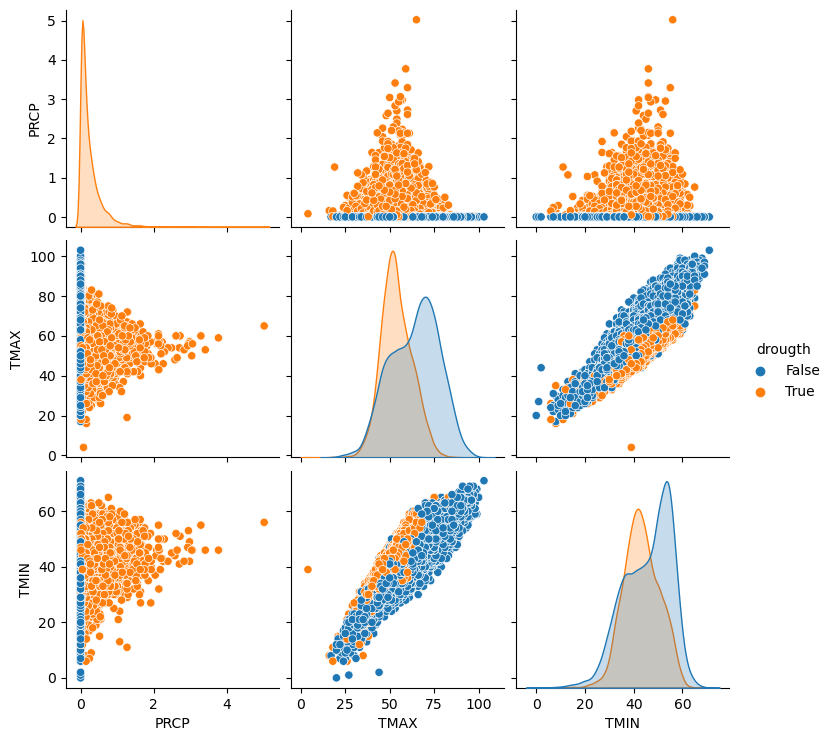

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot for features and target
sns.pairplot(data, hue='drougth')
plt.show()


In [20]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression

Linear Regression MSE: 0.1415887288929456
Linear Regression R^2: 0.4195605911677499
Prediction for new data: [0.56688448]


D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


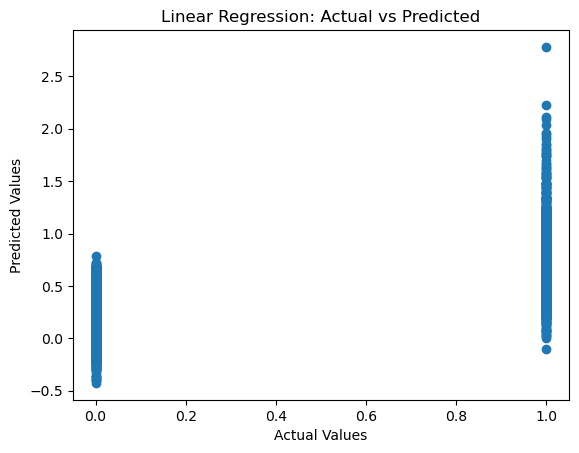

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your dataset
# Example data loading and preprocessing
data = pd.read_csv('drought_data.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')

# Handle missing values
# Option 1: Drop rows with missing values
data = data.dropna()

# Option 2: Fill missing values with the mean (or median, or any other strategy)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies
data[['PRCP', 'TMAX', 'TMIN']] = imputer.fit_transform(data[['PRCP', 'TMAX', 'TMIN']])

# Feature selection
features = data[['PRCP', 'TMAX', 'TMIN']]
target = data['drougth']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# a) Load and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# b) Predict and evaluate
y_pred = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred))
print('Linear Regression R^2:', r2_score(y_test, y_pred))

# c) Predict for new data
new_data = np.array([[0.5, 60, 40]])
new_prediction = lr.predict(new_data)
print('Prediction for new data:', new_prediction)

# d) Plot model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


#### SVM

In [35]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Load and preprocess the dataset
data = pd.read_csv('drought_data.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
data[['PRCP', 'TMAX', 'TMIN']] = imputer.fit_transform(data[['PRCP', 'TMAX', 'TMIN']])

# Feature selection
X = data[['PRCP', 'TMAX', 'TMIN']]
y = data['drougth']

# Ensure the target variable is categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# a) Load and fit the model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# b) Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

# c) Predict for new data
new_data = np.array([[0.5, 60, 40]])
new_data_scaled = scaler.transform(new_data)
new_prediction_svm = svm_model.predict(new_data_scaled)
print('SVM Prediction for new data:', new_prediction_svm)

# d) Plot model
# For SVM, plotting decision boundary is only feasible in 2D feature space
if X.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()
else:
    print("Feature dimensionality is not 2D. Visualization of SVM decision boundary is not feasible.")


SVM Accuracy: 0.9771081980043045
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2956
           1       1.00      0.95      0.97      2154
           2       0.00      0.00      0.00         1

    accuracy                           0.98      5111
   macro avg       0.65      0.65      0.65      5111
weighted avg       0.98      0.98      0.98      5111

SVM Prediction for new data: [1]
Feature dimensionality is not 2D. Visualization of SVM decision boundary is not feasible.


D:\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, b

#### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# a) Load and fit the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# b) Predict and evaluate
y_pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy:', nb.score(X_test, y_test))

# c) Predict for new data
new_prediction_nb = nb.predict(new_data)
print('Naive Bayes Prediction for new data:', new_prediction_nb)

# d) Plot model
# For Naive Bayes, visualization depends on dimensionality. Plot decision boundary if 2D features.


Naive Bayes Accuracy: 1.0
Naive Bayes Prediction for new data: [1]


#### Random Forest

Random Forest Accuracy: 0.9998043435726863


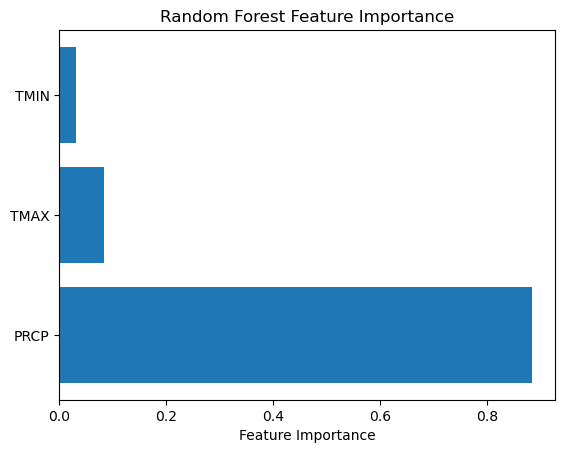

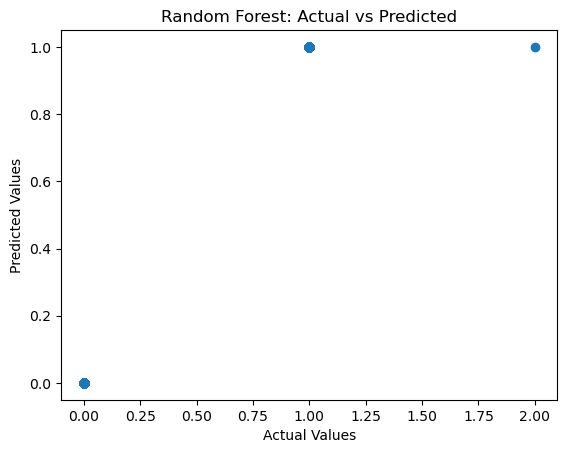

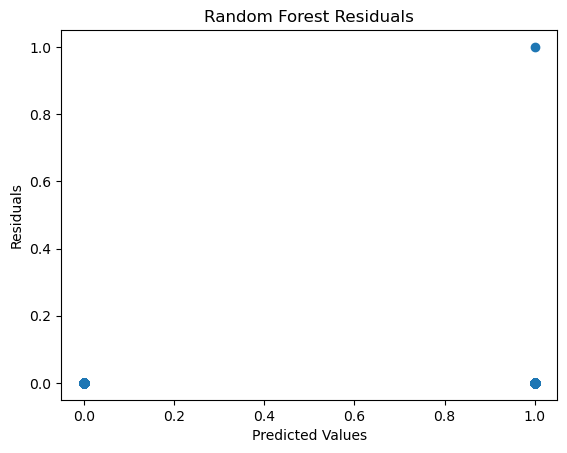

In [37]:
from sklearn.ensemble import RandomForestClassifier

# a) Load and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# b) Predict and evaluate
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', rf.score(X_test, y_test))

# c) Plot model
importances = rf.feature_importances_

# Feature Importance Plot
plt.barh(features.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Scatter Plot of Actual vs Predicted
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# Residual Plot
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')
plt.show()


In [39]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the dataset
data = pd.read_csv('drought_data.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
data[['PRCP', 'TMAX', 'TMIN']] = imputer.fit_transform(data[['PRCP', 'TMAX', 'TMIN']])

# Feature selection
X = data[['PRCP', 'TMAX', 'TMIN']]
y = data['drougth']

# Ensure the target variable is categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

# Save the Standard Scaler to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
